# Data Preprocessing & Exploratory Data Analysis (EDA)

1. In this phase, data is usually check for:
- data completeness (check on missing value, collect data type label)
- data accuracy (data making sense or not)

2. Then, data wrangling will be performed for cleanup of data mentioned in **step 1** including:
- replacing missing values
- remove customer/s with data issue

## 0. Setup

In [1]:
# import related libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import packages for determining features selection
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier

#import package for features engineering & transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

/Users/faizpuad/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. 1st EDA

In [2]:
# specify raw file location
raw_file = '../data/raw/loan_default_data.xlsx'

# read source file as dataframe
df = pd.read_excel(raw_file)

# expand the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# see the first 5 rows of data in the file
df.head()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,zip_code,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,2001-01-01,0.0,NaN,0.0,0.0,0.0,“0.00%”,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,2005-08-01,5.0,NaN,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,751xx,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investors', 'term', 'interest_rate', 'installment',
       'employment_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'zip_code', 'address_state', 'debt_to_income_ratio',
       'no_delinquency_2yrs', 'earliest_credit_line', 'inquiries_last_6mths',
       'months_since_last_delinquency', 'no_open_accounts', 'public_records',
       'revolving_balance', 'revolving_utillization', 'no_total_account',
       'total_payment', 'total_payment_investors', 'total_received_principal',
       'total_received_interest', 'last_payment_date', 'last_payment_amnt',
       'next_payment_date', 'last_credit_pull_date', 'repay_fail'],
      dtype='object')

In [5]:
# count rows,columns exist in data
row, column = df.shape
print(f'Number of rows: {row} , Number of columns or features : {column} \n')

# check datatype of each columns
print(df.info())

Number of rows: 38480 , Number of columns or features : 37 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     38480 non-null  int64         
 1   id                             38480 non-null  int64         
 2   member_id                      38480 non-null  int64         
 3   loan_amount                    38479 non-null  float64       
 4   funded_amount                  38479 non-null  float64       
 5   funded_amount_investors        38479 non-null  float64       
 6   term                           38480 non-null  object        
 7   interest_rate                  38480 non-null  float64       
 8   installment                    38479 non-null  float64       
 9   employment_length              37487 non-null  object        
 10  home_ownership       

In [6]:
# check missing values in all the field
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'loan_amount': number of missing values '1' ==> '0.003%'
'funded_amount': number of missing values '1' ==> '0.003%'
'funded_amount_investors': number of missing values '1' ==> '0.003%'
'installment': number of missing values '1' ==> '0.003%'
'employment_length': number of missing values '993' ==> '2.581%'
'annual_income': number of missing values '2' ==> '0.005%'
'no_delinquency_2yrs': number of missing values '1' ==> '0.003%'
'inquiries_last_6mths': number of missing values '1' ==> '0.003%'
'months_since_last_delinquency': number of missing values '24363' ==> '63.313%'
'no_open_accounts': number of missing values '1' ==> '0.003%'
'public_records': number of missing values '1' ==> '0.003%'
'revolving_balance': number of missing values '4' ==> '0.010%'
'revolving_utillization': number of missing values '59' ==> '0.153%'
'no_total_account': number of missing values '1' ==> '0.003%'
'total_payment': number of missing values '1' ==> '0.003%'
'total_payment_investors': number of missing val

- Notice that some features have more than 91% missing value. It will not give any insight in this analysis.
- For features with less than 5% missing values, it can be simply removed and not significantly impact analysis
- Mssing values threshold reference: https://www.sciencedirect.com/science/article/pii/S0895435618308710#:~:text=Statistical%20guidance%20articles%20have%20stated,18%5D%2C%20%5B19%5D. 


In [7]:
print(df.term.unique())
df.term.value_counts().to_frame()

['36 months' '60 months']


,count
term,
36 months,28593
60 months,9887


Customers only opt for 3 years or 10 years loan term with majority into the shorter loan term

In [8]:
# No missing value for loan_status feature
# check proportion of repay_fail based on loan_status 
print(df.groupby(['loan_status', 'repay_fail'])['repay_fail'].agg('count'))

loan_status                                          repay_fail
Charged Off                                          1              5111
Current                                              0               867
Default                                              1                 2
Does not meet the credit policy. Status:Charged Off  1               689
Does not meet the credit policy. Status:Fully Paid   0              1782
Fully Paid                                           0             29987
In Grace Period                                      0                15
Late (16-30 days)                                    1                 7
Late (31-120 days)                                   1                20
Name: repay_fail, dtype: int64


In [9]:
# No missing value for loan_status feature
# check proportion of repay_fail based on loan_status
print(df.groupby(['purpose', 'repay_fail'])['repay_fail'].agg('count'))

purpose             repay_fail
car                 0              1318
                    1               163
credit_card         0              4398
                    1               576
debt_consolidation  0             15136
                    1              2781
educational         0               304
                    1                82
home_improvement    0              2517
                    1               384
house               0               324
                    1                63
major_purchase      0              1861
                    1               218
medical             0               558
                    1               117
moving              0               469
                    1                93
other               0              3270
                    1               680
renewable_energy    0                75
                    1                16
small_business      0              1305
                    1               503
vacation 

- Checking proportion for catgeorical data is important to avoid having obvious strong linear relationship with target variable. if it is 1 to 1 relationship, than obviously model will predict accurately but overfit due to poor generalization.
- The two features above show non direct distribution of unique values with repay_fail

In [10]:
# check for any illogical data : 
# 1. funded amount investor larger than funded amount (no such case)
# 2. funded amount larger than total loan amount (no such case)
# There are no case of nonsensible amount recorded

print(len(df[df.funded_amount > df.loan_amount]) , len(df[df.funded_amount_investors > df.funded_amount]))

# check whether columns loan_amount and funded amount not equivalent
# 1770 rows where the loan_amount and funded amount are not equivalent
# if the features are similar, one of it can be dropped to provide multicollinearity
print(len(df[df.loan_amount != df.funded_amount]))

0 0
1770


Illogical data reduce the analysis integrity. It would make the analysis too ambiguous and should be evaded

In [11]:
# Check imbalance target variable before cleanup
df.repay_fail.value_counts(normalize=True)

repay_fail
0    0.848519
1    0.151481
Name: proportion, dtype: float64

The data is heavy imbalanced with ratio (84 : 16)

## 1.1 Observation of 1st EDA

- Based on the datatype shown in above table, below are some noticable observation done:
    - Columns ('Unnamed: 0 ','id','member_id') are not related for analysis. They only act as unique customer identifier and does not represent any significant information of customer's loan behavior. They can be dropped out.
    - Columns ('zip_code', 'address_state') also is not required as it does not assist in describing the customers' loan behavior. They can be dropped out.
    - Missing values. These are the features with the most missing values.
        - months_since_last_delinquency : 24363
        - next_payment_date : 35097
        - employment_length : 993
        - last_payment_date : 71
        - revolving_utillization : 59
    - Datatypes. Few features can be transformed into discrete nominal/ordinal datatype instead of object which refer as string:
        - term, employment_length, home_ownership, verification_status, loan_status , purpose
    - The data contain imbalance class of customers with records of default(repayment failed with 85%) and those who does not (with 15%)

## 2. 1st Data Preprocessing

In [12]:
# remove unnnecessary columns. These are columns that are not contribute in identfying probability of customer's default
# 'Unnamed: 0 ','id','member_id', 'zip_code', 'address_state'
# Also, remove columns with many missing values
# months_since_last_delinquency : 24363 missing values , next_payment_date : 35097 missing values
# these features are not useful as more than half of the data are empty

# drop these unnecessary columns
df = df.drop(columns=['Unnamed: 0','id','member_id', 'zip_code', 'address_state', 'months_since_last_delinquency', 'next_payment_date' ]).reset_index(drop=True)


In [13]:
# based on the proportion of loan_status to repay_fail, not all loan_status result to repay fail and should be dropped
columns = ['Fully Paid', 'Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 
           'Does not meet the credit policy. Status:Charged Off', 'Fully Paid', 'Late (16-30 days)', 'Late (31-120 days)', 'Default']
df = df[df['loan_status'].isin(columns)].reset_index(drop=True)

In [14]:
# It is observed loan status is actually similar to repay_fail
# All fully paid status will result into repay_fail 0 and charged off with repay fail 1
# With slight negilgible other loan status

# check proportion of repay_fail based on loan_status 
print(df.groupby(['loan_status', 'repay_fail'])['repay_fail'].agg('count'))

# drop this column as it will affect model prediction due to bias (direct one on one relationship)
df = df.drop(columns = ['loan_status']).reset_index(drop=True)

loan_status                                          repay_fail
Charged Off                                          1              5111
Default                                              1                 2
Does not meet the credit policy. Status:Charged Off  1               689
Does not meet the credit policy. Status:Fully Paid   0              1782
Fully Paid                                           0             29987
Late (16-30 days)                                    1                 7
Late (31-120 days)                                   1                20
Name: repay_fail, dtype: int64


In [15]:
# Create new columns that count if a customer contain many incomplete information
# Significant amount of missing value impact in model integrity later on
df['missing_values_count'] = df.isnull().sum(axis=1)

# check proportion of customers with missing data issue
print(df['missing_values_count'].value_counts())

# remove row with high count of missing value
df = df[df['missing_values_count']<=2].reset_index(drop=True)

# remove column missing_values_count as it is not needed
df = df.drop(columns=['missing_values_count']).reset_index(drop=True)

missing_values_count
0    36513
1     1075
2       10
Name: count, dtype: int64


In [16]:
# convert object to numerical column (float)
# Remove the percentage sign and convert to float
def remove_pct_symbols(x):
    try:
        x = x.replace('"', '').replace('“', '').replace('”', '').replace('%', '')
        x = float(x)
    except: pass
    return x

# Apply the function to the 'interest_rate' column
df['revolving_utillization'] = df['revolving_utillization'].apply(remove_pct_symbols)

# convert target variable as category / binary column
df['repay_fail'] = df['repay_fail'].astype('int')

# clean data that has similar meaning
df['verification_status'] = df['verification_status'].str.replace('Source Verified','Verified') 
df['term'] = df['term'].str.replace('36 months','36').replace('60 months','60').astype('int')

In [17]:
# check for remaining missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'employment_length': number of missing values '958' ==> '2.548%'
'annual_income': number of missing values '1' ==> '0.003%'
'revolving_balance': number of missing values '3' ==> '0.008%'
'revolving_utillization': number of missing values '59' ==> '0.157%'
'last_payment_date': number of missing values '71' ==> '0.189%'
'last_credit_pull_date': number of missing values '3' ==> '0.008%'


In [18]:
# drop observations(rows) with missing value proportion less than 5%
missing_percentages = df.isnull().mean() * 100

# Define the threshold
threshold = 5.0

# Identify columns with missing values below the threshold
columns_below_threshold = missing_percentages[missing_percentages < threshold].index

# Drop rows with missing values in these columns
df_cleaned = df.dropna(subset=columns_below_threshold)

# Update cleaned data
df = df_cleaned.copy()

In [19]:
# For datetime datatype, the data is further extrapolate into year as specific date is not applicable
# As too specific data will expose to overfit / not generalize enough model
# Also, some date might be removed as in prediction, it almost impossible to know when an event happen at specific date
# Thus, only year duration might help in visualize data but not for prediction

# Focus dataframe on datetime features:
columns = ['term','issue_date','earliest_credit_line','last_payment_date','last_credit_pull_date']
df_date = df[columns]

# View summary statistics of data
df_date.describe()

,term,issue_date,earliest_credit_line,last_payment_date,last_credit_pull_date
count,36513.000000,36513,36513,36513,36513
mean,41.767151,2010-09-16 13:50:31.501109248,1997-03-26 00:30:05.472023680,2013-01-26 20:56:20.231698176,2014-08-18 15:53:29.563717120
min,36.000000,1999-12-01 00:00:00,1946-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00
25%,36.000000,2010-03-01 00:00:00,1994-01-01 00:00:00,2012-02-01 00:00:00,2013-04-01 00:00:00
50%,36.000000,2010-12-01 00:00:00,1998-06-01 00:00:00,2013-03-01 00:00:00,2015-02-01 00:00:00
75%,36.000000,2011-07-01 00:00:00,2001-10-01 00:00:00,2014-04-01 00:00:00,2016-06-01 00:00:00
max,60.000000,2011-12-01 00:00:00,2008-11-01 00:00:00,2016-06-01 00:00:00,2016-06-01 00:00:00
std,10.254486,NaN,NaN,NaN,NaN


- As the dataset is not specified on timeframe, using minimum and maximum year is taken as time range of dataset
- Thus, the data is assumed to consist of customers from 1946 to 2016

In [20]:
# last_credit_pull_date indicate last customer information refresh is done
# earliest_credit_line is the first credit initiate by customers (assume as the earliest date of customer onboarded)
# as the latest refresh date at 2016, the data is assumed to be a snapshot and as position of 2016
df_date = df.copy()

# create new features to tag year customer onboarded and year since customer exist as at 2016
df_date['customer_onboard_yr'] = df_date['earliest_credit_line'].dt.year
df_date['yr_as_customer'] = 2016 - df_date['customer_onboard_yr']

# create new features to identify completed month term of payment
# also create features to see difference between term and completed month term payment
# Calculate the difference in months between the two datetime columns
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

df_date['term_since_last_pay_mth'] = df_date.apply(lambda row: diff_month(row['last_payment_date'], row['issue_date']), axis=1).astype('int')
df_date['diff_term_completed'] = df['term'] - df_date['term_since_last_pay_mth']

# convert loan issue date in year format
df_date['issue_date_yr'] = df_date['issue_date'].dt.year

# remove initial columns as extrapolated column provide better information of customers
columns = ['issue_date','earliest_credit_line','last_payment_date','last_credit_pull_date']
df_date = df_date.drop(columns=columns).reset_index(drop=True)

# reinstate df to new change
df = df_date.copy()

In [21]:
# check target label proportion (in percentage) after cleanup
df.repay_fail.value_counts(normalize=True)

repay_fail
0    0.848684
1    0.151316
Name: proportion, dtype: float64

The target label still remain unbalance at similar proportion

## 3. 2nd EDA
1. Check distribution of continuous, discrete and categorical features

In [22]:
# Identify column datatypes
continuous_cols = df.select_dtypes(include=['float64']).columns
discrete_cols = df.select_dtypes(include=['int64']).columns
ordinal_cols = ['employment_length','home_ownership','verification_status','purpose'] 
discrete_n_ordinals = list(discrete_cols) + list(ordinal_cols)

In [23]:
# quick summary for current clean data
print('Discrete and categorical datatype summary')
print(df[discrete_n_ordinals].describe().T)
print('\n Numeric datatype summary')
print(df[continuous_cols].describe().T)

Discrete and categorical datatype summary
                           count       mean        std   min   25%   50%  \
term                     36513.0  41.767151  10.254486  36.0  36.0  36.0   
repay_fail               36513.0   0.151316   0.358361   0.0   0.0   0.0   
term_since_last_pay_mth  36513.0  28.357078  13.664264   1.0  18.0  31.0   
diff_term_completed      36513.0  13.410073  15.076980 -49.0   0.0   9.0   

                          75%   max  
term                     36.0  60.0  
repay_fail                0.0   1.0  
term_since_last_pay_mth  37.0  85.0  
diff_term_completed      23.0  59.0  

 Numeric datatype summary
                            count          mean           std  min  \
loan_amount               36513.0  11025.311533   7312.932344  0.0   
funded_amount             36513.0  10765.797798   7061.858192  0.0   
funded_amount_investors   36513.0  10060.420973   7042.622125  0.0   
interest_rate             36513.0     12.117391      3.675067  0.0   
installmen

/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


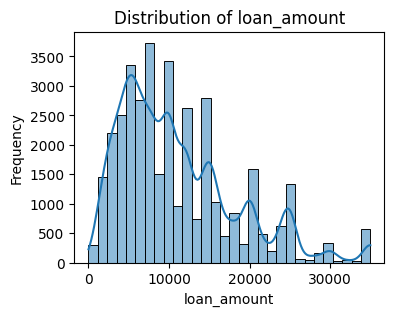

Skewness of loan_amount: 1.0697302315829305


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


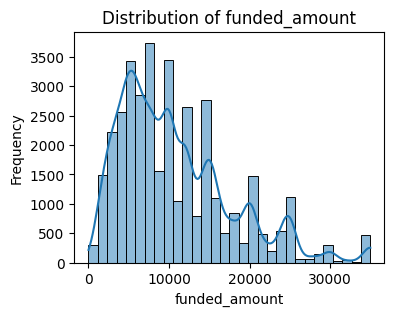

Skewness of funded_amount: 1.0917237553095103


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


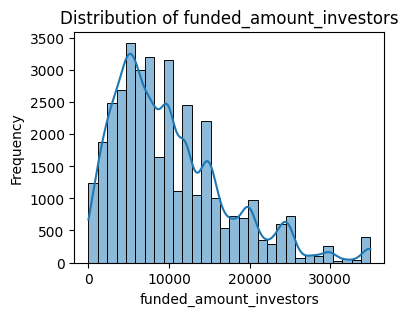

Skewness of funded_amount_investors: 1.1116682993114633


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


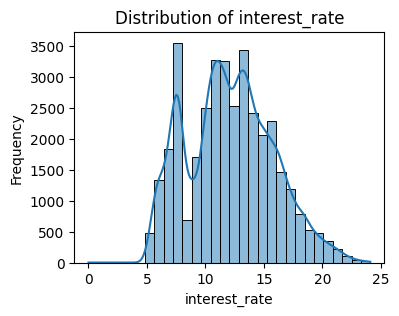

Skewness of interest_rate: 0.23179709207866558


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


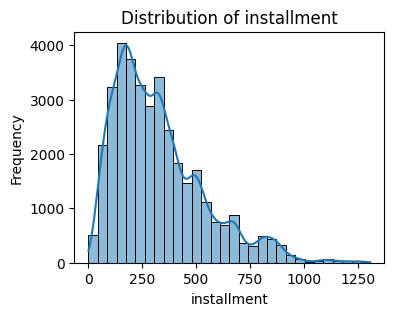

Skewness of installment: 1.1320602305576613


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


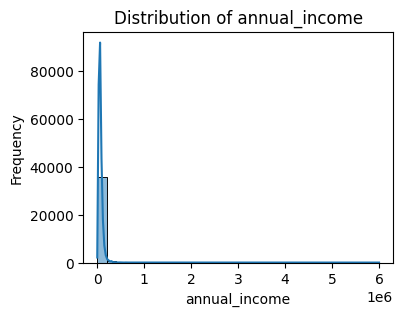

Skewness of annual_income: 30.869695014069187


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


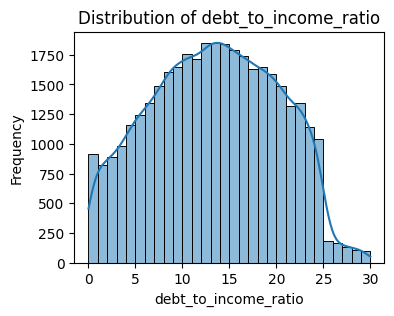

Skewness of debt_to_income_ratio: -0.03150195660997087


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


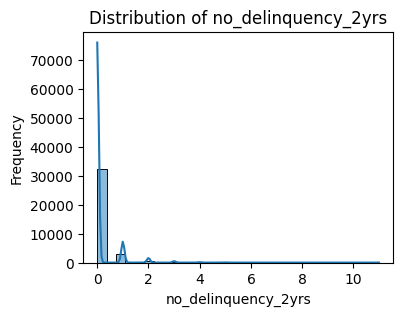

Skewness of no_delinquency_2yrs: 5.157102493383103


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


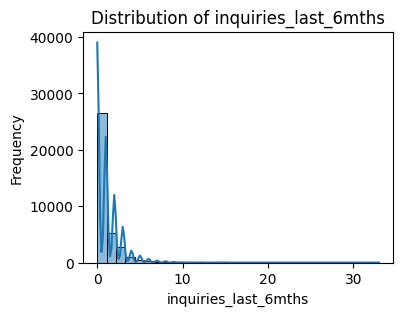

Skewness of inquiries_last_6mths: 3.5712456149747602


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


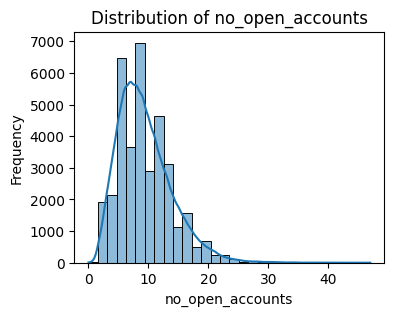

Skewness of no_open_accounts: 1.0437072980145932


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


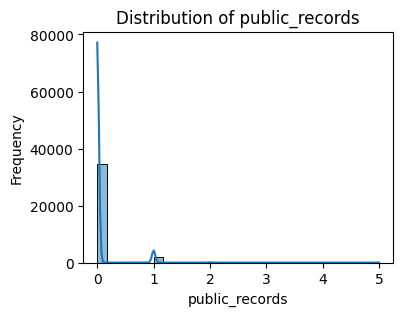

Skewness of public_records: 4.735279136667719


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


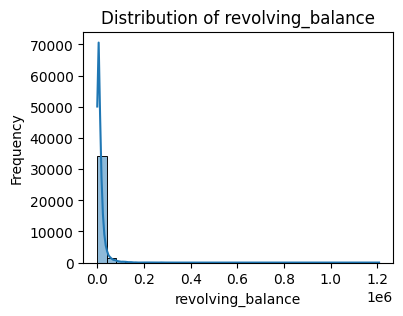

Skewness of revolving_balance: 11.413204413449295


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


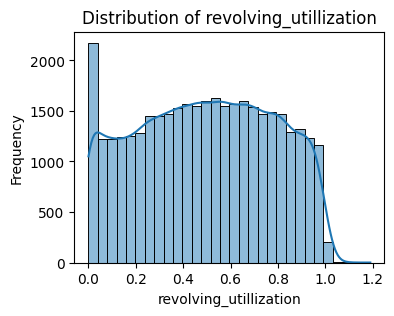

Skewness of revolving_utillization: -0.04260435860802313


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


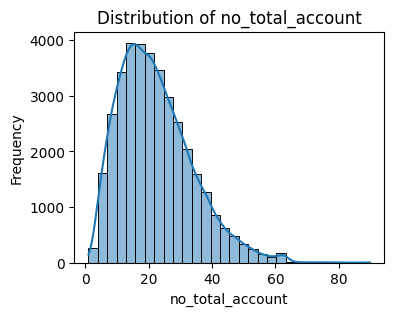

Skewness of no_total_account: 0.8224443184121414


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


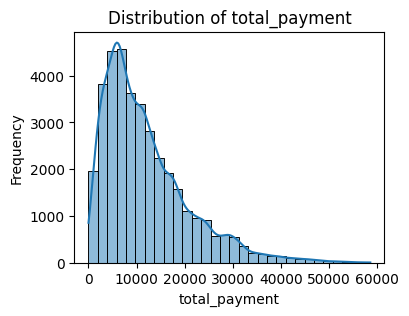

Skewness of total_payment: 1.3501243181772749


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


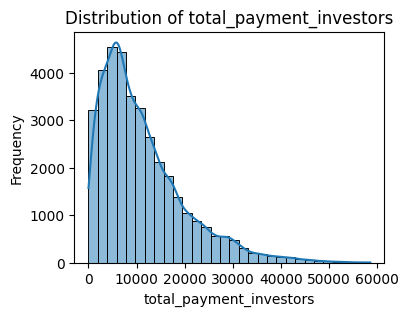

Skewness of total_payment_investors: 1.3637791741802918


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


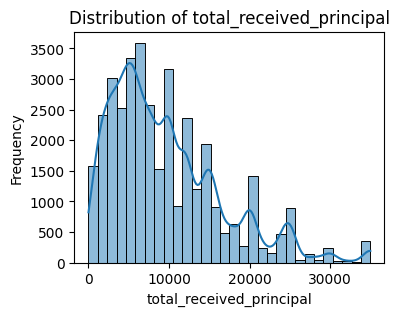

Skewness of total_received_principal: 1.1439661467886368


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


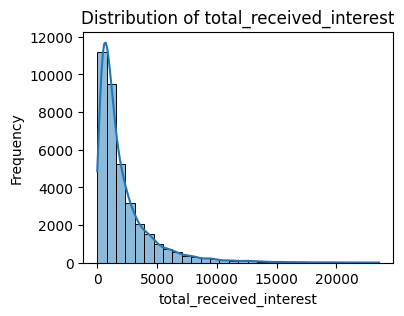

Skewness of total_received_interest: 2.6811307474802617


/Users/faizpuad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


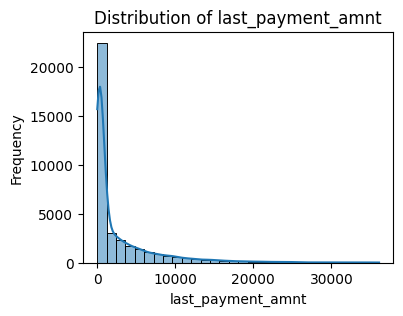

Skewness of last_payment_amnt: 2.692719525372262


In [24]:
# Visualize distribution for continuous data
for col in continuous_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Check for skewness
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

**Noticeable trend for continuous data:**
- Most of continuous features has skewness and not in normal distribution
- Feature interest_rate is considerably in a standard distribution and later statistic applied on it can represent the population
- Annual income is heavily right skewed (30.8) due to high variance between large data and mean data. Also same case for delinquency,inquiries, public records, revolving balance

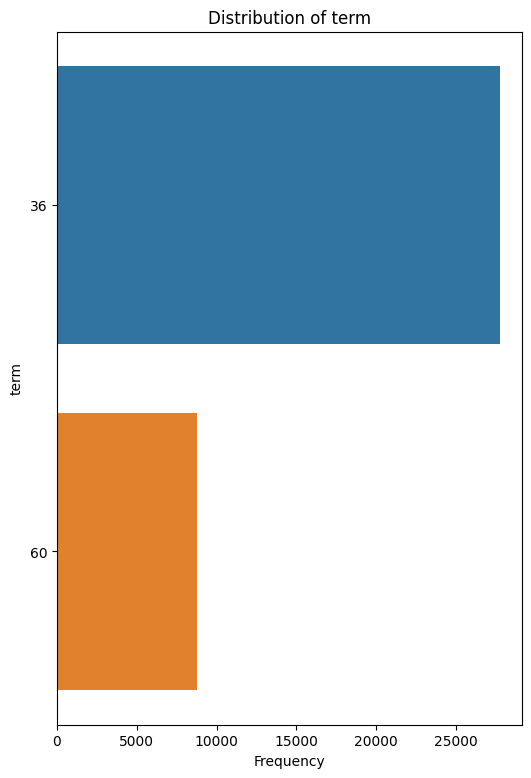

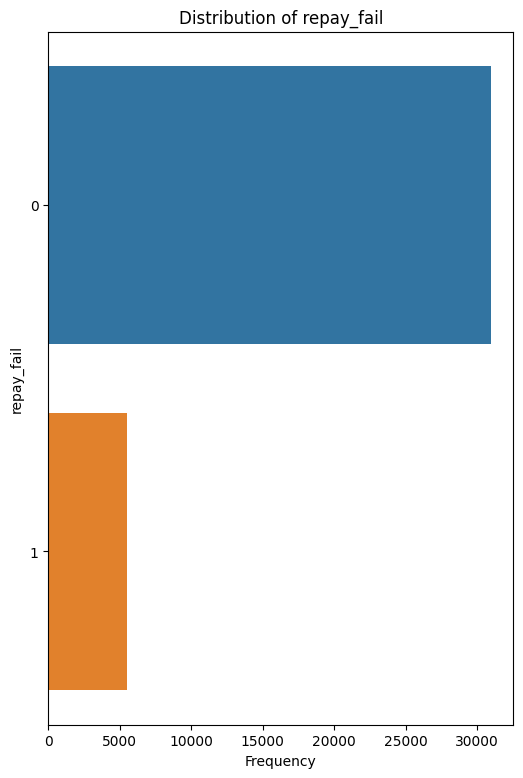

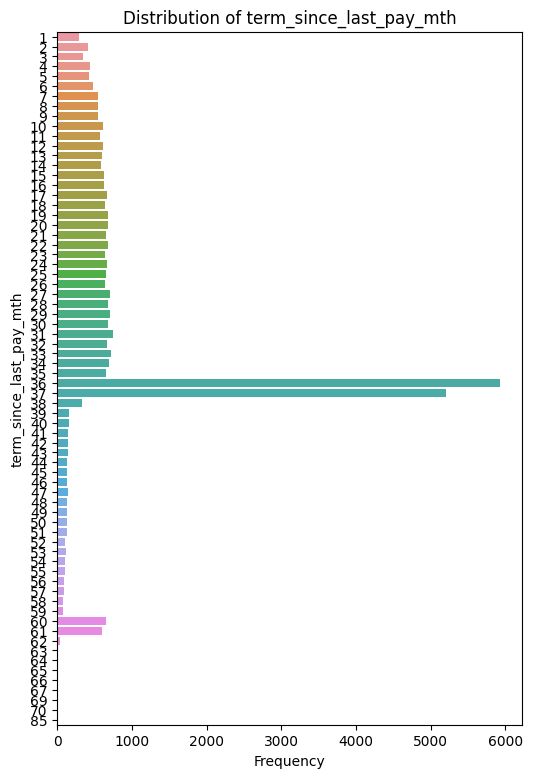

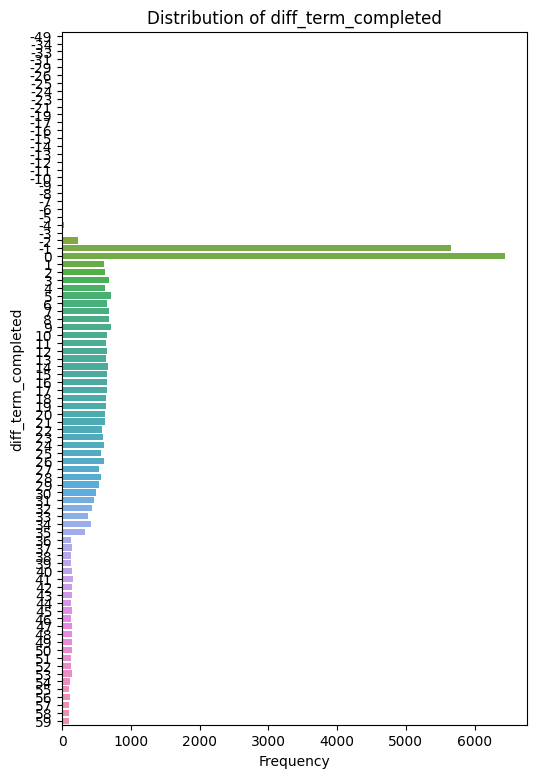

In [25]:
# Visualize distribution for discrete data
for col in discrete_cols:
    plt.figure(figsize=(6, 9))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()

In [26]:
condition = df['diff_term_completed']< 0

exceed_term = df[condition]

print(exceed_term['diff_term_completed'].value_counts().sum())

print(exceed_term['repay_fail'].value_counts(normalize=True))

6033
repay_fail
0    0.993867
1    0.006133
Name: proportion, dtype: float64


**Noticeable trend for discrete data:**
- the customers are majority has 3 years term loan
- Repay_fail is highly imbalanced
- there are **6033** customers that has last payment date exceeding the term period (as from issued date) but 99% of them are not default

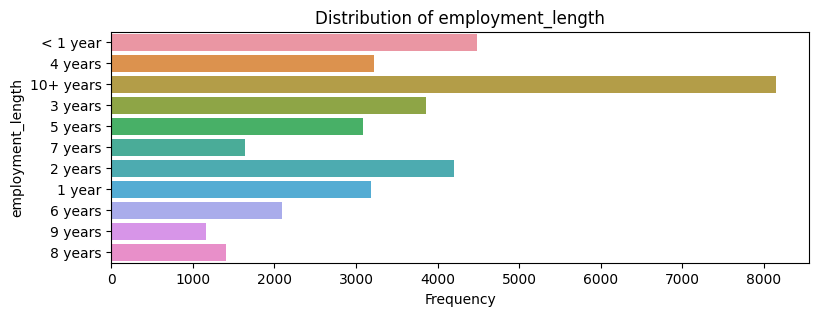

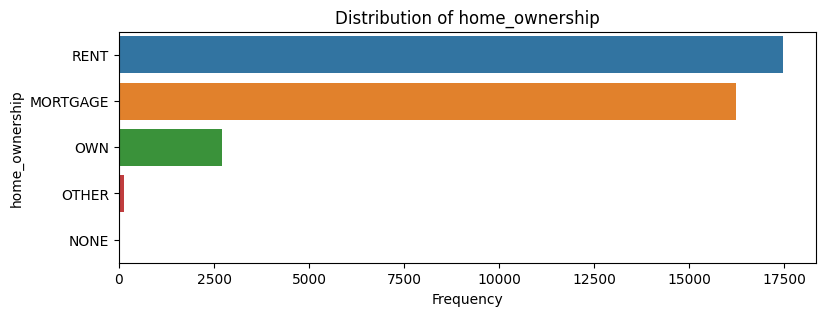

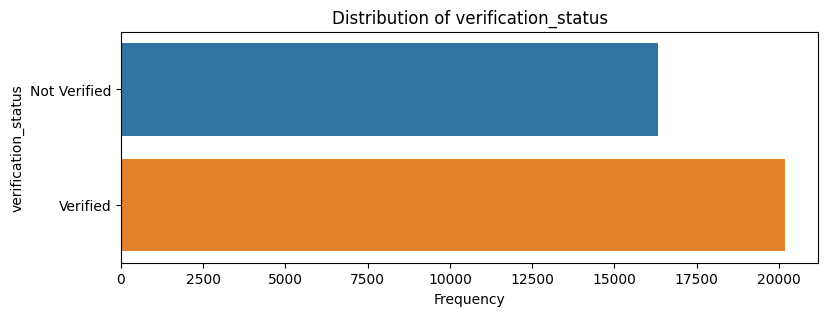

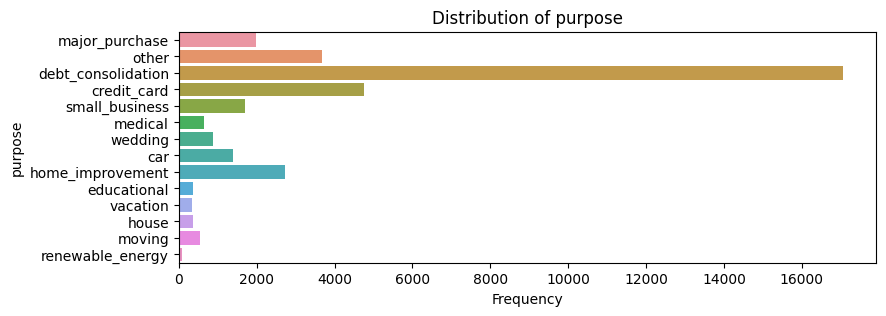

In [27]:
# Visualize distribution for ordinal or nominal data
for col in ordinal_cols:
    plt.figure(figsize=(9, 3))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()

In [28]:
#check does income verification failed still can have loan?
# it is indeed possible
df.groupby(['verification_status','repay_fail'])['repay_fail'].agg('count')

verification_status  repay_fail
Not Verified         0             14057
                     1              2266
Verified             0             16931
                     1              3259
Name: repay_fail, dtype: int64

**Noticeable trend for nominal & ordinal data:**
- the customers employement range is highly diverse in experience where more than years top the chart and also followed by less than a year experience as second highest
- customers with debt consolidation is the highest purpose in the dataset

## 4. 2nd Data Preprocessing

In [29]:
# Check for object datatype, what type of categorical it is? Nominal or Ordinal

# For nominal or binary, one hot encoding will be performed as it does not have any order assoicate with each value
# Nominal/binary columns: home_ownership, verification_status, loan_status, purpose
# Enforce drop first to avoid multicollinearity between features
dummies = ['home_ownership', 'verification_status', 'purpose']
df = pd.get_dummies(df, columns=dummies, drop_first=True, dtype='int')

# For ordinal, a ranking in integer value will be given with 0 being the lowest to indicate order of values
# Ordinal columns: employment_length, term, home_ownership

employment_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Define the mapping for employment length
term_mapping = {
    36: 0,
    60: 1
}

# Apply the mapping to the relevant features

df['term_ordinal'] = df['term'].map(term_mapping)
df['employment_length_ordinal'] = df['employment_length'].map(employment_length_mapping)

df.drop(columns=['employment_length', 'term'], axis=1, inplace=True)

# Convert target label into binary
df.repay_fail = df.repay_fail.astype('int')

# remove created imputated feature
# feature has 99% non default thus not really bring insight to predict default potential
df = df.drop('diff_term_completed',axis=1).reset_index(drop=True)

Few assumptions taken to remove outlier based on the visualization done in previous step.
- Few features are assumed to be completely occur at random ocurrence includes:
    - term, no_delinquency_2yrs, no_open_accounts, home_ownership, purpose
    - these features are not happening at regular interval
    - varies between customers (not all has public records, same type home ownership and loan purpose, customer onboarding date)
- Also, for target variable, removing outlier has tendency to remove variance from data and causing more overfit

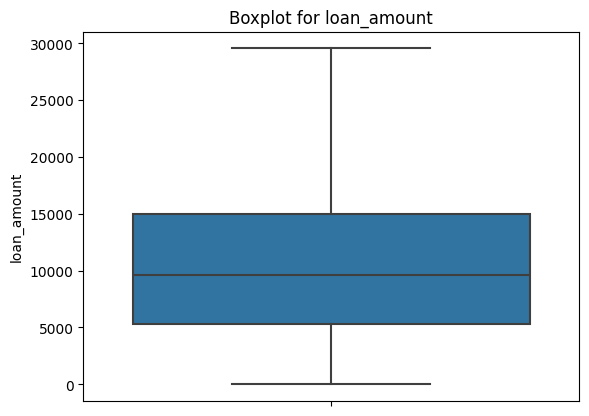

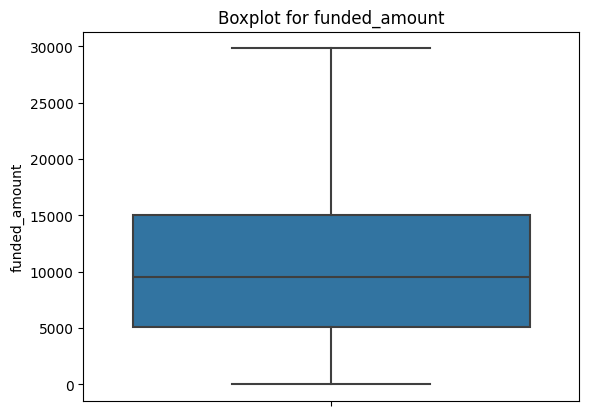

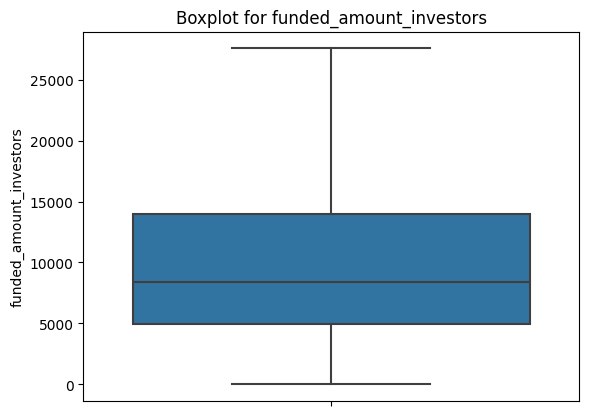

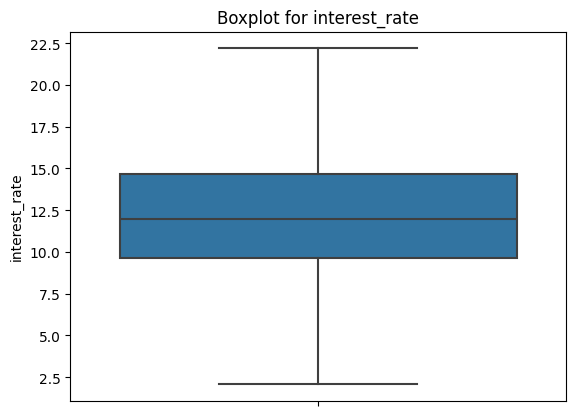

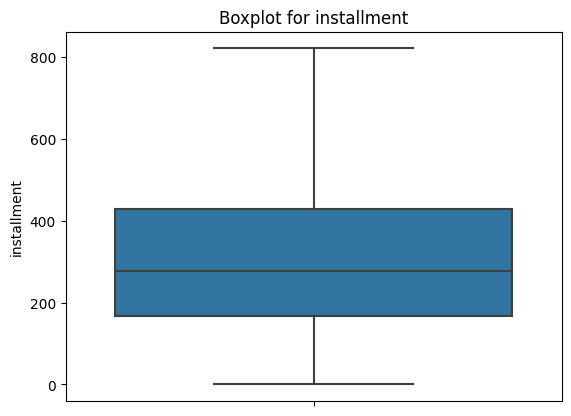

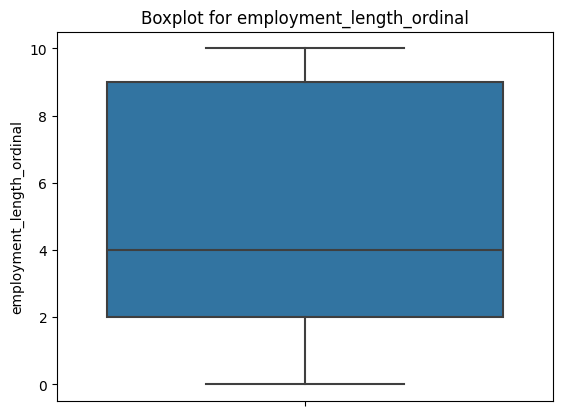

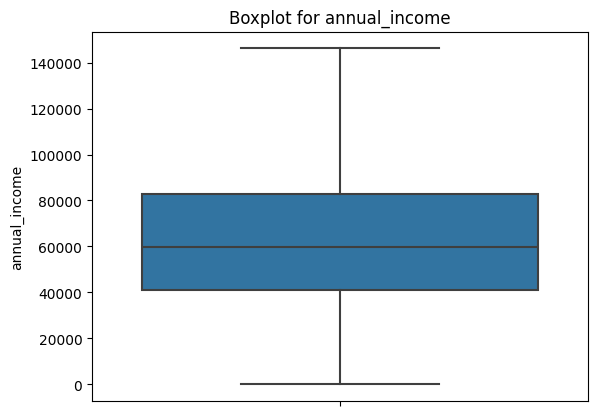

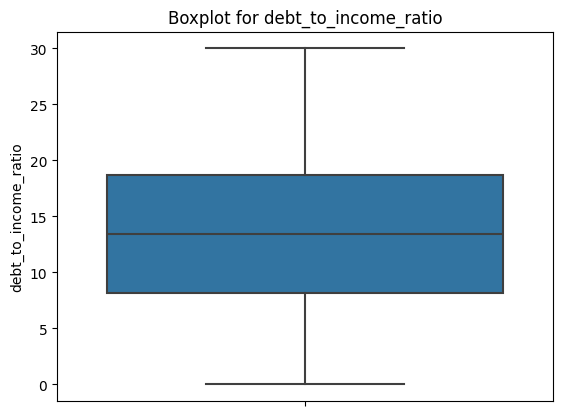

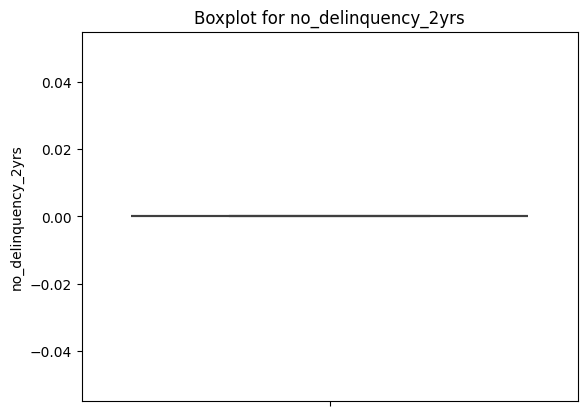

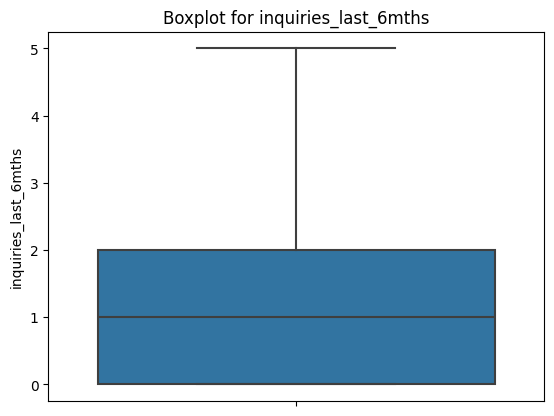

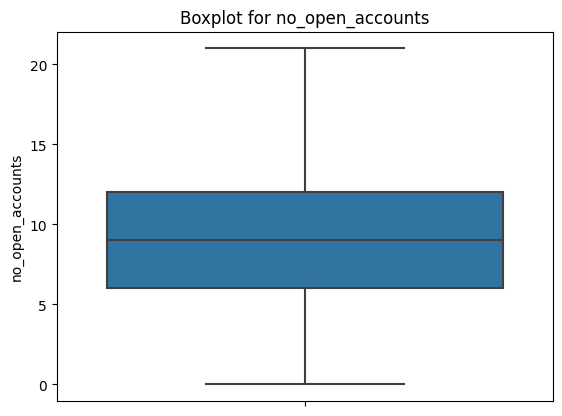

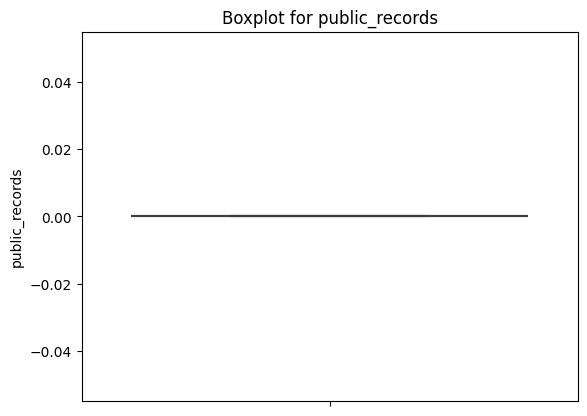

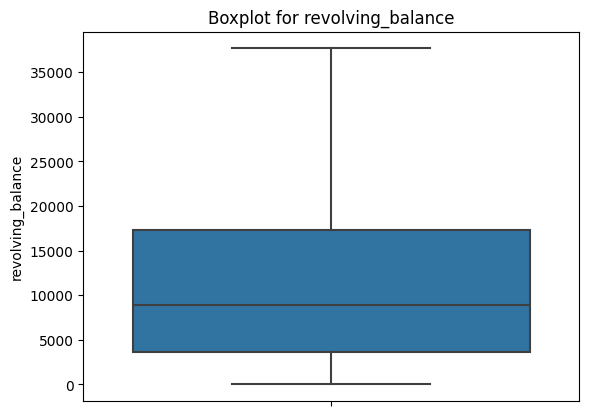

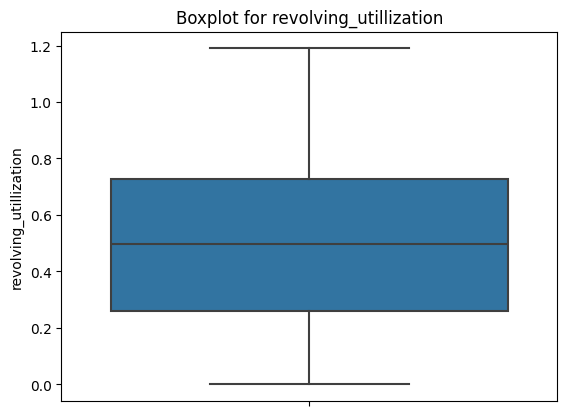

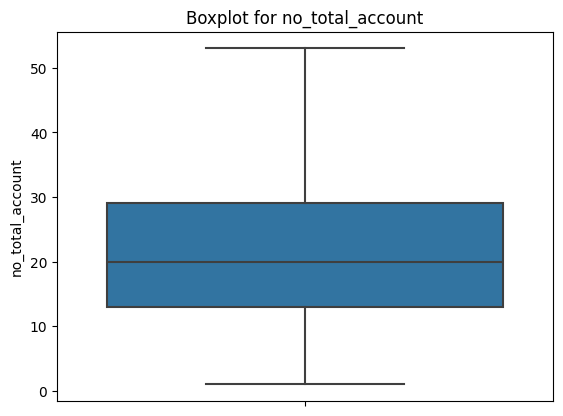

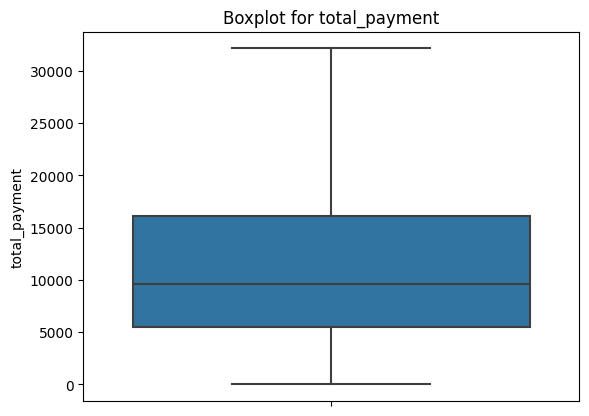

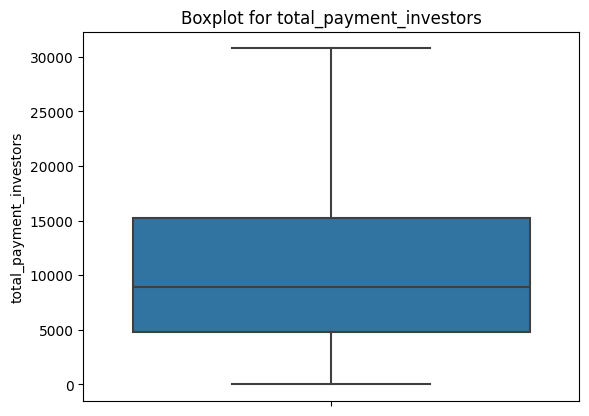

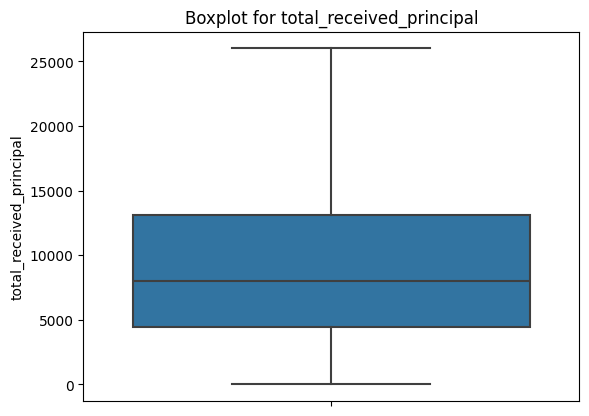

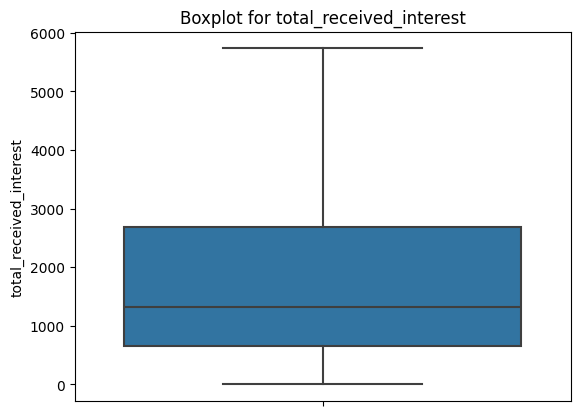

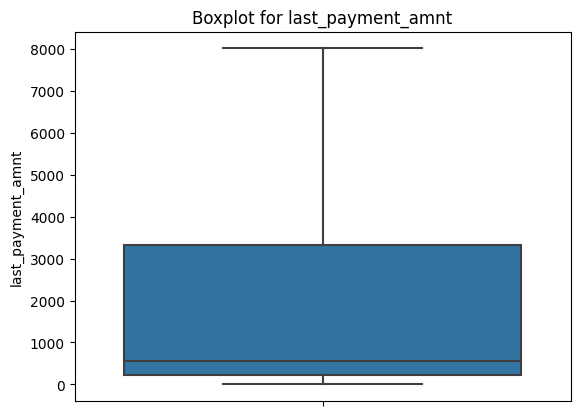

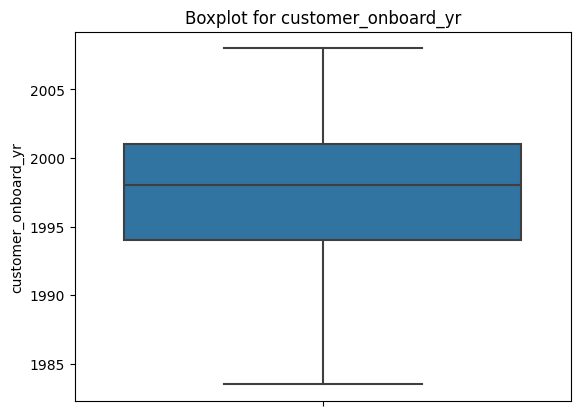

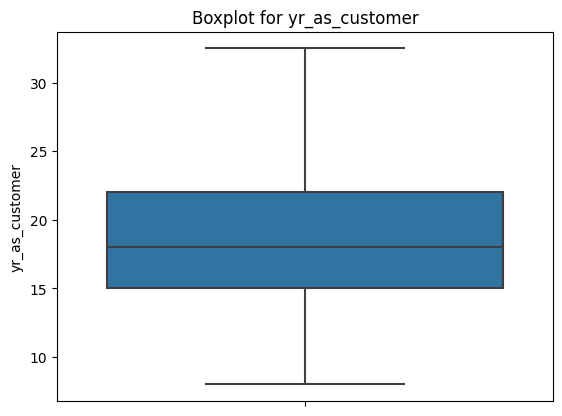

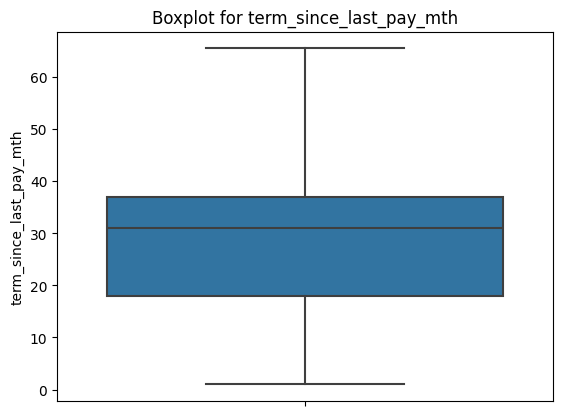

In [30]:
# Identify features to remove outlier from
columns_outlier = ['loan_amount', 'funded_amount', 'funded_amount_investors',
       'interest_rate', 'installment', 'employment_length_ordinal',
       'annual_income','debt_to_income_ratio', 'no_delinquency_2yrs', 'inquiries_last_6mths',
       'no_open_accounts', 'public_records', 'revolving_balance',
       'revolving_utillization', 'no_total_account', 'total_payment',
       'total_payment_investors', 'total_received_principal',
       'total_received_interest', 'last_payment_amnt',
       'customer_onboard_yr', 'yr_as_customer', 'term_since_last_pay_mth']

# Function to remove outliers using interquartile range (IQR) method
def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower, upper)
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot for {col}')
        plt.show()

# Apply outlier removal only to the specified columns
remove_outliers(df, columns_outlier)

df = df.reset_index(drop=True)

In [31]:
# Check for missing values
print(df.describe())

# Remove columns no_delinquency_2yrs and public_records as they are not containing useful info edcept 0
df = df.drop(columns=['no_delinquency_2yrs','public_records']).reset_index(drop=True)

        loan_amount  funded_amount  funded_amount_investors  interest_rate  \
count  36513.000000   36513.000000             36513.000000   36513.000000   
mean   10930.661682   10692.883014              9947.767993      12.115475   
std     7034.600191    6835.959692              6704.602913       3.669179   
min        0.000000       0.000000                 0.000000       2.075000   
25%     5300.000000    5125.000000              4950.000000       9.620000   
50%     9600.000000    9500.000000              8400.000000      11.990000   
75%    15000.000000   15000.000000             14000.000000      14.650000   
max    29550.000000   29812.500000             27575.000000      22.195000   

        installment  annual_income  debt_to_income_ratio  no_delinquency_2yrs  \
count  36513.000000   36513.000000          36513.000000              36513.0   
mean     320.192382   65574.471438             13.356568                  0.0   
std      198.735278   32949.059611              6.7199

### Deal with Imbalanced Data
- 85% of the target variable (repay_fail) is  a good loan and only 15% is default
- Technique used:
    - Oversampling

In [32]:
# check current target label proportion
df.repay_fail.value_counts(normalize=True)

repay_fail
0    0.848684
1    0.151316
Name: proportion, dtype: float64

Oversampling is selected in the model preparation.
- Upsampling simply added duplicate record to match majority class
- Thus, the upsampling only done later in model preparation as to remain original test data portion to still introduce variance for model
  

### Fix Imbalanced data
- oversampling
    - to assist for feature selection. not for model training
- feature selection

In [33]:
# Split into features and label
y = df['repay_fail']
X = df.drop(['repay_fail'], axis=1)

In [34]:
# Normalize the data (optional)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
#check data already normalized
X.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,36513.0,0.369904,0.238058,0.0,0.179357,0.324873,0.507614,1.0
funded_amount,36513.0,0.358671,0.229298,0.0,0.171908,0.318658,0.503145,1.0
funded_amount_investors,36513.0,0.360753,0.243141,0.0,0.179510,0.304624,0.507706,1.0
interest_rate,36513.0,0.499030,0.182365,0.0,0.375000,0.492793,0.625000,1.0
installment,36513.0,0.389751,0.241909,0.0,0.202829,0.338770,0.521697,1.0
annual_income,36513.0,0.448550,0.225382,0.0,0.279578,0.408367,0.567747,1.0
debt_to_income_ratio,36513.0,0.445367,0.224073,0.0,0.273091,0.448816,0.621874,1.0
inquiries_last_6mths,36513.0,0.208129,0.257877,0.0,0.000000,0.200000,0.400000,1.0
no_open_accounts,36513.0,0.442908,0.204540,0.0,0.285714,0.428571,0.571429,1.0
revolving_balance,36513.0,0.320817,0.287159,0.0,0.096816,0.235204,0.458089,1.0


In [36]:
# Split into train and test set

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)

# Print the shape size of train dataset
print(X_train.shape, y_train.shape)

# Print the shape size of test dataset
print(X_test.shape, y_test.shape)

(25559, 41) (25559,)
(10954, 41) (10954,)


In [37]:
# Oversampling
# Concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
majority_class = train_data[train_data.repay_fail == 0]
minority_class = train_data[train_data.repay_fail == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class
                              random_state=2024)

# Combine majority class with upsampled minority class
upsampled_train = pd.concat([majority_class, minority_upsampled])

# Separate X and y for the upsampled train set
X_train_resampled = upsampled_train.drop(columns=['repay_fail'])
y_train_resampled = upsampled_train['repay_fail']

In [38]:
#verify upsampling succeed
y_train_resampled.value_counts()

repay_fail
0    21673
1    21673
Name: count, dtype: int64

### Feature Selection
- The feature selection has tendecy to be biased towards majority target class due to imbalance data
- Technique used
1. SelectKbest
2. ExtraTreeClassifier
3. Features Correlation

Top 10 Features from SelectKBest:
                                 Score
last_payment_amnt         4314.377122
total_received_principal  2415.893275
total_payment_investors   1237.542595
term_ordinal              1223.111246
total_payment             1137.150844
term_since_last_pay_mth    850.044308
purpose_small_business     440.101940
inquiries_last_6mths       293.539361
interest_rate              238.081772
purpose_major_purchase     152.980990


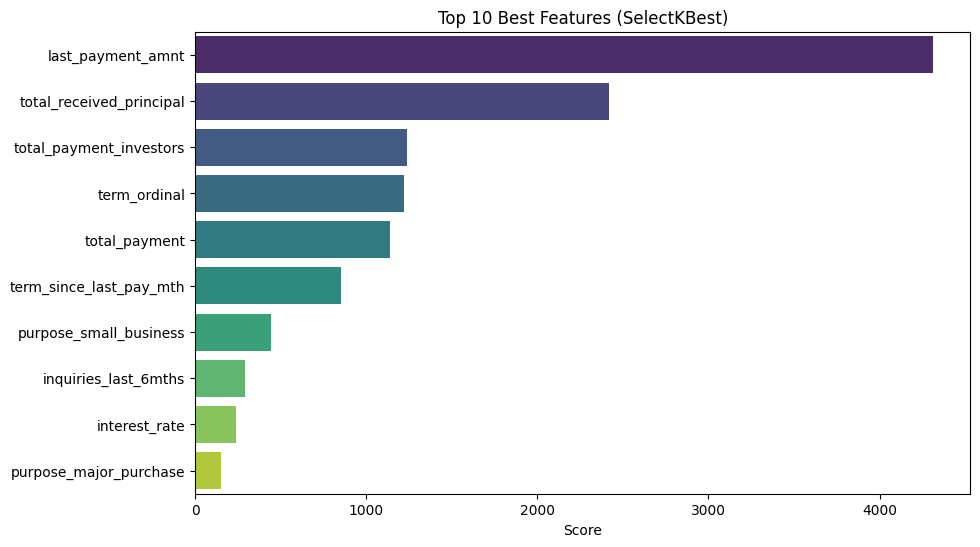

Top 10 Features from ExtraTreesClassifier:
 total_received_principal    0.169529
last_payment_amnt           0.156204
term_since_last_pay_mth     0.117336
total_payment               0.078726
total_payment_investors     0.069923
funded_amount               0.051491
loan_amount                 0.045977
installment                 0.043469
term_ordinal                0.037053
funded_amount_investors     0.035639
dtype: float64


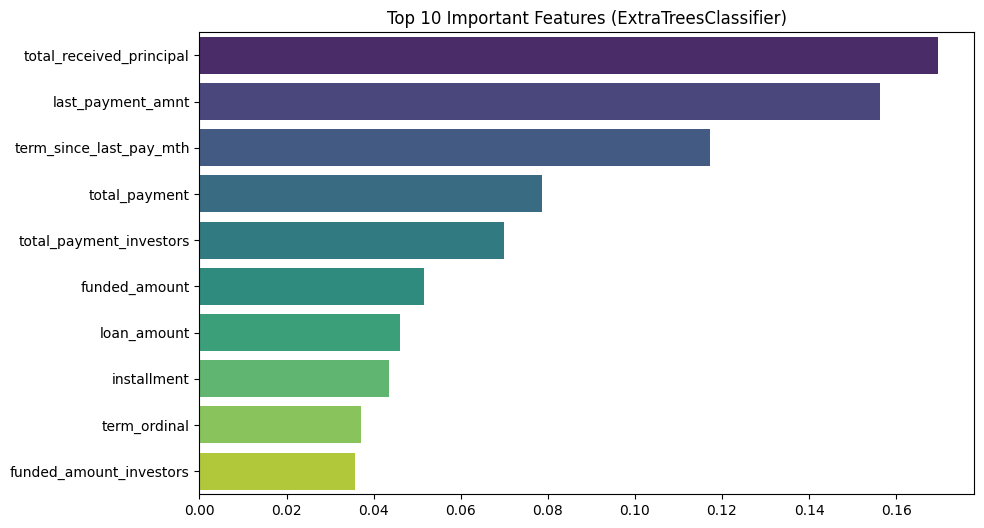

Top 10 Features from Correlation Analysis:
                               Correlation
interest_rate                    0.292841
term_ordinal                     0.201294
revolving_utillization           0.144836
inquiries_last_6mths             0.143992
purpose_small_business           0.104229
loan_amount                      0.079911
funded_amount                    0.075929
debt_to_income_ratio             0.062832
installment                      0.045705
verification_status_Verified     0.042134


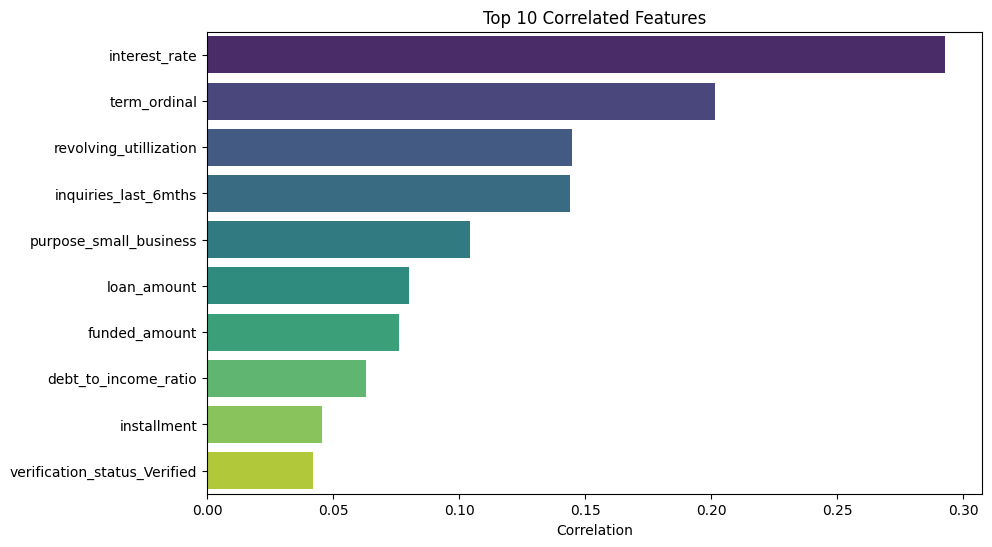

In [39]:
# Feature Importance Using SelectKBest
best_feature = SelectKBest(score_func=chi2, k=10)
fit = best_feature.fit(X_train_resampled, y_train_resampled)

# Get feature scores and column names
df_score = pd.DataFrame(fit.scores_, index=X.columns, columns=['Score'])
top_10_features_selectkbest = df_score.nlargest(10, 'Score')
print("Top 10 Features from SelectKBest:\n", top_10_features_selectkbest)

# Plotting SelectKBest results
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y=top_10_features_selectkbest.index, data=top_10_features_selectkbest, palette='viridis')
plt.title('Top 10 Best Features (SelectKBest)')
plt.show()

# Feature Importance Using ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_10_features_extratrees = feature_importances.nlargest(10)
print("Top 10 Features from ExtraTreesClassifier:\n", top_10_features_extratrees)

# Plotting ExtraTreesClassifier results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features_extratrees.values, y=top_10_features_extratrees.index, palette='viridis')
plt.title('Top 10 Important Features (ExtraTreesClassifier)')
plt.show()

# Correlation Analysis
correlations = X_train_resampled.corrwith(pd.Series(y_train_resampled))
correlation_df = pd.DataFrame(correlations, columns=['Correlation'])
top_10_correlated_features = correlation_df.nlargest(10, 'Correlation')
print("Top 10 Features from Correlation Analysis:\n", top_10_correlated_features)

# Plotting Correlation results
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y=top_10_correlated_features.index, data=top_10_correlated_features, palette='viridis')
plt.title('Top 10 Correlated Features')
plt.show()

In [40]:
# select best features
final_column = df[['last_payment_amnt', 'total_received_principal', 'term_ordinal', 'total_payment_investors', 'total_payment',
                    'term_since_last_pay_mth', 'purpose_small_business', 'inquiries_last_6mths', 'interest_rate', 'purpose_credit_card',
                    'funded_amount', 'installment', 'loan_amount', 'funded_amount_investors', 'interest_rate', 'revolving_utillization', 
                     'purpose_small_business', 'debt_to_income_ratio', 'verification_status_Verified', 'purpose_major_purchase',
                    'repay_fail']]

In [41]:
# finalize features for modeling later
final_column = final_column.columns
df = df[final_column]

In [42]:
# save cleaned and processed data as csv
df.to_csv('../data/processed/loan_default_data.csv', index=False)